**level 1**

# ***Task1***

In [4]:
from collections import Counter
import pandas as pd


#to Read the CSV file into a pandas DataFrame
df=pd.read_csv('/Dataset .csv')

#to Calculate the frequency of each cuisine
cuisine_counts = Counter(df['Cuisines'])

#to Determine the top three most common cuisines
top_cuisines = cuisine_counts.most_common(3)

# to Calculate the total number of restaurants
total_restaurants = len(df)

#to Calculate the percentage of restaurants that serve each of the top cuisines
percentage_per_cuisine = [(cuisine, count / total_restaurants * 100) for cuisine, count in top_cuisines]

print("Top three most common cuisines:")
for cuisine, count in top_cuisines:
    print(f"{cuisine}: {count} restaurants")

print("\nPercentage of restaurants that serve each of the top cuisines:")
for cuisine, percentage in percentage_per_cuisine:
    print(f"{cuisine}: {percentage:.2f}%")


Top three most common cuisines:
North Indian: 936 restaurants
North Indian, Chinese: 511 restaurants
Chinese: 354 restaurants

Percentage of restaurants that serve each of the top cuisines:
North Indian: 9.80%
North Indian, Chinese: 5.35%
Chinese: 3.71%


# ***Task 2***

In [7]:
import pandas as pd

# Identify the city with the highest number of restaurants
city_with_most_restaurants = df['City'].value_counts().idxmax()

# Calculate the average rating for restaurants in each city
average_rating_per_city = df.groupby('City')['Aggregate rating'].mean()

# Determine the city with the highest average rating
city_with_highest_avg_rating = average_rating_per_city.idxmax()

print(f"City with the highest number of restaurants: {city_with_most_restaurants}")

print("\nAverage rating for restaurants in each city:")
print(average_rating_per_city)

print(f"\nCity with the highest average rating: {city_with_highest_avg_rating}")


City with the highest number of restaurants: New Delhi

Average rating for restaurants in each city:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

City with the highest average rating: Inner City


In [8]:

most_common_price_range = df['Price range'].mode()[0]

# Display result
print(f"Most Common Price Range: {most_common_price_range}")

Most Common Price Range: 1


In [21]:
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

# Display result
print("Average rating for each price range:")
print(round(avg_rating_by_price_range,3))


Average rating for each price range:
Price range
1    1.997
2    2.941
3    3.683
4    3.818
Name: Aggregate rating, dtype: float64


# ***Task 3***

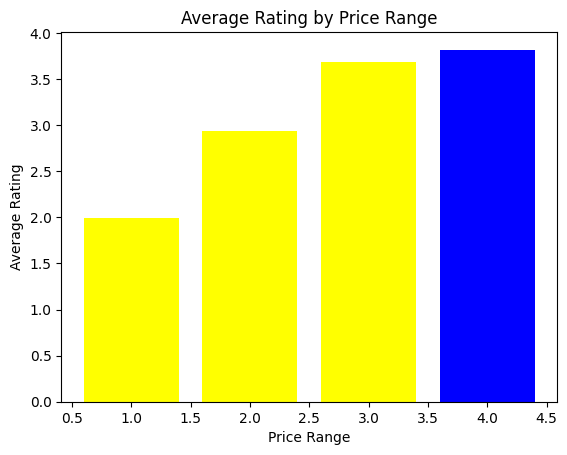

In [22]:
import matplotlib.pyplot as plt

highest_avg_rating_color = avg_rating_by_price_range.idxmax()

# Create the bar plot
plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color='yellow')

# Set the color of the bar corresponding to the highest average rating to a distinct color (e.g., red)
plt.bar(highest_avg_rating_color, avg_rating_by_price_range[highest_avg_rating_color], color='blue')

# Set labels
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')

# Highlight the bar for the highest average rating
plt.show()

# ***task 4***

In [12]:
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'no': False})

# Calculate the percentage of restaurants that offer online delivery


percentage_online_delivery = (df['Has Online delivery'].sum() / len(df)) * 100

print(f"Percentage of restaurants that offer online delivery: {percentage_online_delivery:.2f}%")



Percentage of restaurants that offer online delivery: 25.66%


In [18]:
df['Aggregate rating'] = df['Aggregate rating'].fillna(0)
avg_rating_with_delivery = df[df['Has Online delivery']=='Yes']['Aggregate rating'].mean()
avg_rating_without_delivery = df[df['Has Online delivery']=='no']['Aggregate rating'].mean()

print(f"Average rating for restaurants with online delivery: {avg_rating_with_delivery:.2f}")
print(f"Average rating for restaurants without online delivery: {avg_rating_without_delivery:.2f}")

    # Compare the average ratings
if avg_rating_with_delivery > avg_rating_without_delivery:
    print("Restaurants with online delivery have higher average rating.")
elif avg_rating_with_delivery < avg_rating_without_delivery:
    print("Restaurants without online delivery have higher average rating.")
else:
    print("Average ratings are the same for both groups.")

Average rating for restaurants with online delivery: nan
Average rating for restaurants without online delivery: nan
Average ratings are the same for both groups.


# ***level 2***
# **task 1**

In [22]:
# Calculate the frequency of each rating
rating_counts = df['Aggregate rating'].value_counts()

# Find the most common rating
most_common_rating = rating_counts.idxmax()
frequency = rating_counts.max()

print(f"The most common rating is {most_common_rating} with a frequency of {frequency}.")


The most common rating is 0.0 with a frequency of 2148.


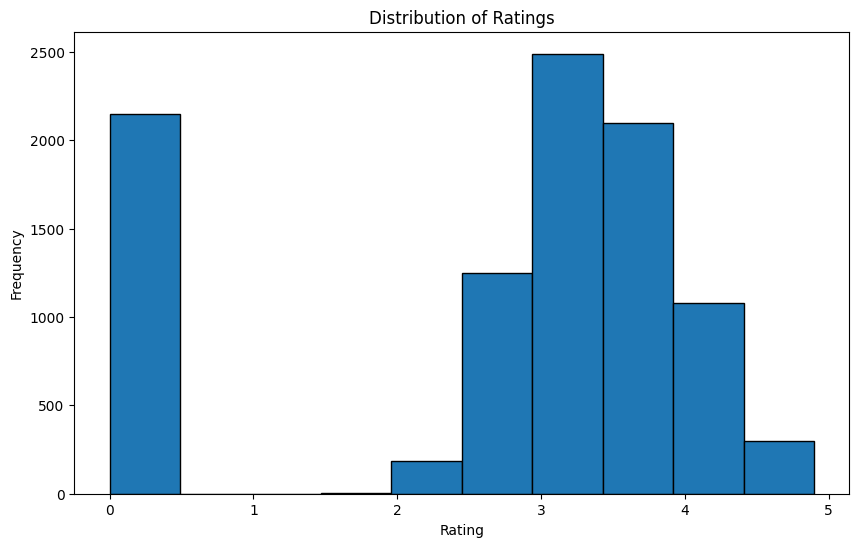

In [24]:
import matplotlib.pyplot as plt

# Plot histogram of ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


# ***task2***

In [6]:

# Drop rows with missing values in the 'cuisines' column
df = df.dropna(subset=['Cuisines'])

# Split the 'cuisines' column into a list of cuisines
df['cuisines_list'] = df['Cuisines'].str.split(',')

# Import combinations from itertools
from itertools import combinations

# Create a list of all unique cuisine combinations
all_combinations = df['cuisines_list'].explode().unique()

# Create a list to store the counts of each cuisine combination
combination_counts = []

# Iterate through each unique combination
for combination in all_combinations:
    # Count the occurrences of the combination in the dataset
    count = df['cuisines_list'].apply(lambda x: set([combination]).issubset(x)).sum()
    combination_counts.append((combination, count))

# Sort the combinations by count in descending order
combination_counts.sort(key=lambda x: x[1], reverse=True)

# Print the most common cuisine combinations
print("Most common cuisine combinations:")
for combination, count in combination_counts[:10]:
    print(f"{combination}: {count} occurrences")

# Calculate the average rating for each cuisine combination
average_ratings = {}
for combination, _ in combination_counts[:10]:
    combination_ratings = df[df['cuisines_list'].apply(lambda x: set([combination]).issubset(x))]['Aggregate rating']
    average_rating = combination_ratings.mean()
    average_ratings[combination] = average_rating

# Print the average ratings for each cuisine combination
print("\nAverage ratings for each cuisine combination:")
for combination, avg_rating in average_ratings.items():
    print(f"{combination}: {avg_rating:.2f}")


Most common cuisine combinations:
North Indian: 2992 occurrences
 Chinese: 1878 occurrences
 Fast Food: 1314 occurrences
 North Indian: 968 occurrences
Chinese: 855 occurrences
 Mughlai: 779 occurrences
Fast Food: 672 occurrences
Bakery: 621 occurrences
Cafe: 617 occurrences
 Italian: 530 occurrences

Average ratings for each cuisine combination:
North Indian: 2.40
 Chinese: 2.75
 Fast Food: 2.67
 North Indian: 2.85
Chinese: 2.33
 Mughlai: 2.78
Fast Food: 2.35
Bakery: 2.33
Cafe: 3.23
 Italian: 3.61


# ***task 3***

<ipython-input-9-b39ab1dcf6db>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


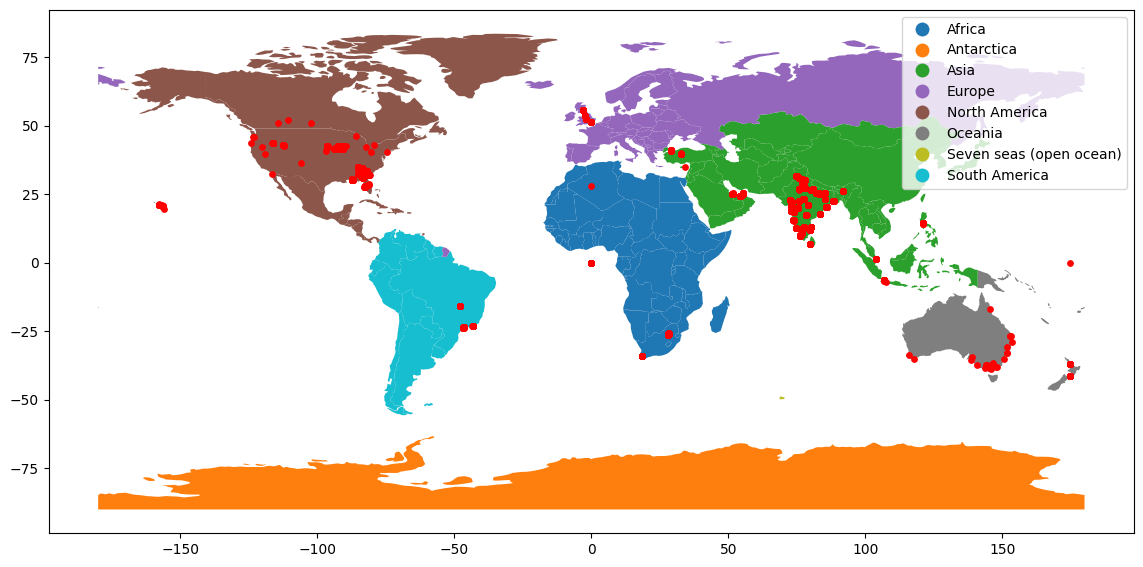

In [9]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame

# Create Point geometry from latitude and longitude using Shapely
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)

# Create a base map of the world using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot("continent", legend = True, figsize=(14, 12)), marker='o', color='red', markersize=15)

# Show the map
plt.show()

# task 4
# Calculate the average rating and popularity for each chain


In [19]:

from tabulate import tabulate

chain_ratings = {}
chain_popularity = {}
for chain in chains:
    chain_data = df[df['Restaurant Name'] == chain]
    average_rating = chain_data['Aggregate rating'].mean()
    popularity = len(chain_data)
    chain_ratings[chain] = average_rating
    chain_popularity[chain] = popularity

table_data = []
for chain in chains:
    table_data.append([chain, chain_ratings[chain], chain_popularity[chain]])

# Print the table
headers = ['Restaurant Chain', 'Average Rating', 'Popularity']
print(tabulate(table_data, headers=headers, floatfmt=".2f", tablefmt="github"))

# Print the average rating and popularity for each chain


| Restaurant Chain                          |   Average Rating |   Popularity |
|-------------------------------------------|------------------|--------------|
| Cafe Coffee Day                           |             2.42 |           83 |
| Domino's Pizza                            |             2.74 |           79 |
| Subway                                    |             2.91 |           63 |
| Green Chick Chop                          |             2.67 |           51 |
| McDonald's                                |             3.34 |           48 |
| Keventers                                 |             2.87 |           34 |
| Pizza Hut                                 |             3.32 |           30 |
| Giani                                     |             2.69 |           29 |
| Baskin Robbins                            |             1.86 |           28 |
| Barbeque Nation                           |             4.35 |           26 |
| Giani's                               